# Batch Effect Calculation and Visualization of the Mouse Thymus Dataset

## Loading Packages

In [1]:
import warnings
warnings.filterwarnings('ignore')

import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('../../../')
from Model.preprocess import preprocessing

## Loading and Preprocessing Data

In [2]:
## Ordinary Expression Data
## RNA
adata_RNA_1 = sc.read_h5ad("../../../Data/Mouse_Thymus_1/adata_RNA.h5ad")
adata_RNA_2 = sc.read_h5ad("../../../Data/Mouse_Thymus_2/adata_RNA.h5ad")
adata_RNA_3 = sc.read_h5ad("../../../Data/Mouse_Thymus_3/adata_RNA.h5ad")

## Protein
adata_ADT_1 = sc.read_h5ad("../../../Data/Mouse_Thymus_1/adata_ADT.h5ad")
adata_ADT_2 = sc.read_h5ad("../../../Data/Mouse_Thymus_2/adata_ADT.h5ad")
adata_ADT_3 = sc.read_h5ad("../../../Data/Mouse_Thymus_3/adata_ADT.h5ad")

## Preprocessing
adata_RNA_1, adata_ADT_1 = preprocessing(adata_RNA_1, adata_ADT_1, 'Stereo-CITE-seq')
adata_RNA_2, adata_ADT_2 = preprocessing(adata_RNA_2, adata_ADT_2, 'Stereo-CITE-seq')
adata_RNA_3, adata_ADT_3 = preprocessing(adata_RNA_3, adata_ADT_3, 'Stereo-CITE-seq')

## Combine
adata_RNA_all = adata_RNA_1.concatenate(adata_RNA_2, adata_RNA_3)
adata_ADT_all = adata_ADT_1.concatenate(adata_ADT_2, adata_ADT_3)

## Clustering Results
adata_clustering_1 = sc.read("../../Mouse_Thymus_Replicate1.h5ad")
adata_clustering_2 = sc.read("../../Mouse_Thymus_Replicate2.h5ad")
adata_clustering_3 = sc.read("../../Mouse_Thymus_Replicate3.h5ad")
adata_clustering_all = adata_clustering_1.concatenate(adata_clustering_2, adata_clustering_3)

Stereo-CITE-seq data preprocessing have done!
Dimensions after preprocessed adata_modal_1: (4183, 3000)
Dimensions after preprocessing adata_modal_2: (4183, 19)
Stereo-CITE-seq data preprocessing have done!
Dimensions after preprocessed adata_modal_1: (4573, 3000)
Dimensions after preprocessing adata_modal_2: (4573, 19)
Stereo-CITE-seq data preprocessing have done!
Dimensions after preprocessed adata_modal_1: (4147, 3000)
Dimensions after preprocessing adata_modal_2: (4147, 19)


In [3]:
print(np.shape(adata_RNA_all))
print(np.shape(adata_ADT_all))
print(np.shape(adata_clustering_all.obs['SpaKnit']))

(12903, 456)
(12903, 19)
(12903,)


## Mapping the Clusters

In [ ]:
mapping_dict = {
    '0': {1: 7, 2: 2, 3: 4, 4: 5, 5: 3, 6: 6, 7: 1},  # batch 0
    '1': {1: 6, 2: 2, 3: 3, 4: 1, 5: 4, 6: 5, 7: 7},  # batch 1
    '2': {1: 6, 2: 3, 3: 5, 4: 2, 5: 1, 6: 4, 7: 7}   # batch 2
}

In [ ]:
for batch in adata_clustering_all.obs['batch'].unique():
    batch_idx = adata_clustering_all.obs['batch'] == batch
    cluster_mapping = mapping_dict[batch]  # Get the mapping for the batch
    adata_clustering_all.obs.loc[batch_idx, 'SpaKnit'] = adata_clustering_all.obs.loc[batch_idx, 'SpaKnit'].map(cluster_mapping)

# Assign the updated cluster results to adata_RNA_all and adata_ADT_all
adata_RNA_all.obs['clusters'] = adata_clustering_all.obs['SpaKnit']
adata_ADT_all.obs['clusters'] = adata_clustering_all.obs['SpaKnit']

In [6]:
adata_RNA_all

AnnData object with n_obs × n_vars = 12903 × 456
    obs: 'orig.ident', 'x', 'y', 'n_genes', 'batch', 'clusters'
    var: 'highly_variable', 'n_cells-0', 'highly_variable_rank-0', 'means-0', 'variances-0', 'variances_norm-0', 'n_cells-1', 'highly_variable_rank-1', 'means-1', 'variances-1', 'variances_norm-1', 'n_cells-2', 'highly_variable_rank-2', 'means-2', 'variances-2', 'variances_norm-2'
    obsm: 'spatial'

## Calculating UMAP

In [7]:
sc.pp.neighbors(adata_RNA_all)
sc.tl.umap(adata_RNA_all)

sc.pp.neighbors(adata_ADT_all)
sc.tl.umap(adata_ADT_all)

         Falling back to preprocessing with `sc.pp.pca` and default params.


## Ploting

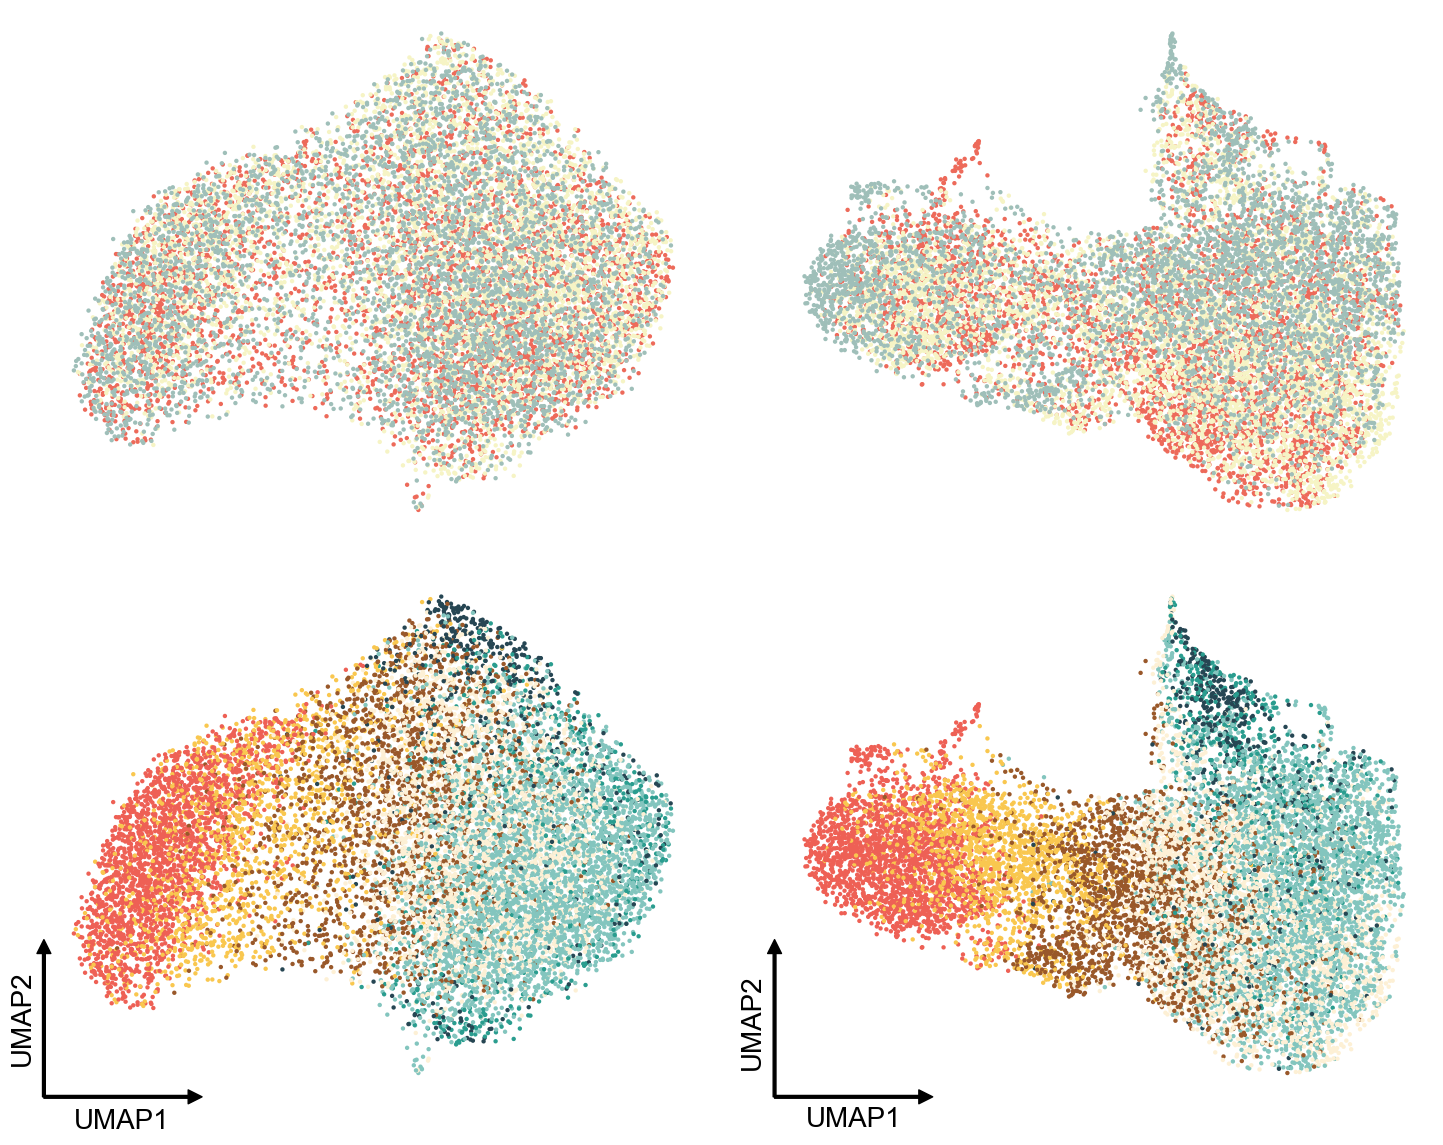

In [ ]:
# define parameters
colors_batch = ['#ed6a5a', '#f6f4c5', '#9fbfb9']
colors_domain = ['#fdf0d5', '#83c5be', '#99582a', '#2a9d8f', '#f9c74f', '#ee6055', '#264653']
spot_size = 40
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))  # 2x2 layout

# Set font and spacing
plt.rcParams['font.size'] = 26
plt.rcParams['font.sans-serif'] = 'Arial'
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.03)
batch = ['1', '2', '3']

# Plot the first subplot - RNA data UMAP
sc.pl.umap(adata_RNA_all, color=['batch'], ax=ax[0, 0], show=False, palette=colors_batch, s=spot_size)
ax[0, 0].set_title('')
ax[0, 0].set_xlabel('')
ax[0, 0].set_ylabel('')
for spine in ax[0, 0].spines.values():
    spine.set_visible(False)

# Plot the second subplot - ADT data UMAP (swap positions)
sc.pl.umap(adata_ADT_all, color=['batch'], ax=ax[0, 1], show=False, palette=colors_batch, s=spot_size)
ax[0, 1].set_title('')
ax[0, 1].set_xlabel('')
ax[0, 1].set_ylabel('')
for spine in ax[0, 1].spines.values():
    spine.set_visible(False)

# Plot the third subplot - RNA data clustering UMAP (swap positions)
sc.pl.umap(adata_RNA_all, color=['clusters'], ax=ax[1, 0], show=False, palette=colors_domain, s=spot_size)
ax[1, 0].set_title('')
ax[1, 0].set_xlabel('')
ax[1, 0].set_ylabel('')
for spine in ax[1, 0].spines.values():
    spine.set_visible(False)

# Plot the fourth subplot - ADT data clustering UMAP
sc.pl.umap(adata_ADT_all, color=['clusters'], ax=ax[1, 1], show=False, palette=colors_domain, s=spot_size)
ax[1, 1].set_title('')
ax[1, 1].set_xlabel('')
ax[1, 1].set_ylabel('')
for spine in ax[1, 1].spines.values():
    spine.set_visible(False)

# Create small coordinate axes
for subplot in [ax[1, 0], ax[1, 1]]:
    subplot.annotate('', xy=(0.24, 0), xytext=(0, 0), arrowprops=dict(width=2, headwidth=10, headlength=10, color='black'), xycoords='axes fraction', textcoords='axes fraction')
    subplot.annotate('', xy=(0, 0.3), xytext=(0, 0), arrowprops=dict(width=2, headwidth=10, headlength=10, color='black'), xycoords='axes fraction', textcoords='axes fraction')

# Add text labels
ax[1, 0].text(2.8, -2, 'UMAP1', ha='right', va='center', fontsize=20, color='black')
ax[1, 0].text(0, 0, 'UMAP2', ha='right', va='center', fontsize=20, color='black', rotation=90)

# Add text labels
ax[1, 1].text(-1.2, -6, 'UMAP1', ha='right', va='center', fontsize=20, color='black')
ax[1, 1].text(-5.8, -3.2, 'UMAP2', ha='right', va='center', fontsize=20, color='black', rotation=90)

# Manually add legend and set point size
for i, axi in enumerate([ax[0, 1], ax[1, 1]]):
    handles, labels = axi.get_legend_handles_labels()
    axi.legend(handles, labels, scatterpoints=1, markerscale=2, title='', bbox_to_anchor=(1, 0.5), loc='center left', framealpha=0, fontsize=20)

# Hide legend (if any)
for subplot in [ax[0, 0], ax[1, 0], ax[0, 1], ax[1, 1]]:
    if subplot.get_legend() is not None:
        subplot.get_legend().remove()

plt.tight_layout()
plt.savefig('Batch_Effect.png', dpi=500)
plt.savefig('Batch_Effect.eps')